In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Decompose Time Series Data**

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

**Time Series Components**

- *Systematic:* Components of the time series that have consistency or recurrence and can be described and modeled.
- *Non-Systematic:* Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise. These components are defined as follows:
- *Level:* The average value in the series. (a must)
- *Trend:* The increasing or decreasing value in the series. (optional)
- *Seasonality:* The repeating short-term cycle in the series. (optional)
- *Noise:* The random variation in the series. (a must)

**It is helpful to think of the components as combining either additively or multiplicatively.**


**Additive Model**

$\ y(t) = Level + Trend + Seasonality+ Noise $

An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

**Multiplicative Model**

$\ y(t) = Level * Trend * Seasonality * Noise $

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A nonlinear seasonality has an increasing or decreasing frequency and/or amplitude over time.

### **Decomposition as a Tool**

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components. Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem.

### **Automatic Time Series Decomposition**

The Statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal decompose(). It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative. The seasonal decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

In [2]:
# The main function for decomposition plot
def plotseaonal(result):
    palette= sns.color_palette("pastel")
    sns.set_theme(style='whitegrid', palette=palette)
    fig,ax = plt.subplots(2,2, figsize=(40,15))
    fontdict={"fontsize":25,"fontfamily":'monospace'}

    colors_list = ['red',
                'darkgreen',
                'indigo','deepskyblue','darkmagenta',
                'midnightblue','crimson','chocolate']

    plot1 = sns.lineplot(data=result.observed,ax=ax[0,0],color=colors_list[0])
    plot2 = sns.lineplot(data=result.trend,ax=ax[0,1],color=colors_list[1])
    plot3 = sns.lineplot(data=result.seasonal,ax=ax[1,0],color=colors_list[2])
    plot4 = sns.lineplot(data=result.resid,ax=ax[1,1],color=colors_list[3])

    # Editing the fontsize and ticks of each label for x
    plot1.set_xlabel("Year",fontsize=20)
    
    # Ticks edits
    # xticks_observed = result.observed.index.year
    # plot1.set_xticklabels(labels=xticks_observed,fontsize=10)

    plot2.set_xlabel("Year",fontsize=20)
    
    # Ticks edits
    # xticks_trend = result.trend.index.year
    # plot2.set_xticklabels(labels=xticks_trend,fontsize=10)
    
    plot3.set_xlabel("Year",fontsize=20)
     
    # Ticks edits
    # xticks_seasonal = result.seasonal.index.year
    # plot3.set_xticklabels(labels=xticks_seasonal,fontsize=10)
    
    plot4.set_xlabel("Year",fontsize=20)
    
    # Ticks edits
    # xticks_resid = result.resid.index.year 
    # plot4.set_xticklabels(labels=xticks_resid,fontsize=10)
   

    # # # Editing the fontsize and ticks of each label for y
    # plot1.set_ylabel("Passengers",fontsize=20)

    # # Ticks edits
    # # yticks_observed = result.observed.values
    # # plot1.set_yticklabels(labels=yticks_observed,fontsize=20)

    # plot2.set_xlabel("Passengers",fontsize=20)

    # # Ticks edits
    # # yticks_trend = result.trend.values
    # # plot2.set_yticklabels(labels=yticks_trend,fontsize=20)
    
    # plot3.set_xlabel("Passengers",fontsize=20)

    # # Ticks edits
    # # yticks_seasonal = result.seasonal.values
    # # plot3.set_yticklabels(labels=yticks_seasonal,fontsize=20)
    
    # plot4.set_ylabel("Passengers",fontsize=20)

    # Ticks edits
    # yticks_resid = result.resid.values
    # plot4.set_yticklabels(labels=yticks_resid,fontsize=20)




    # Editing the title
    plot1.set_title("Observed",fontdict=fontdict)
    plot2.set_title("Trend",fontdict=fontdict)
    plot3.set_title("Seasonal",fontdict=fontdict)
    plot4.set_title("Residual",fontdict=fontdict)

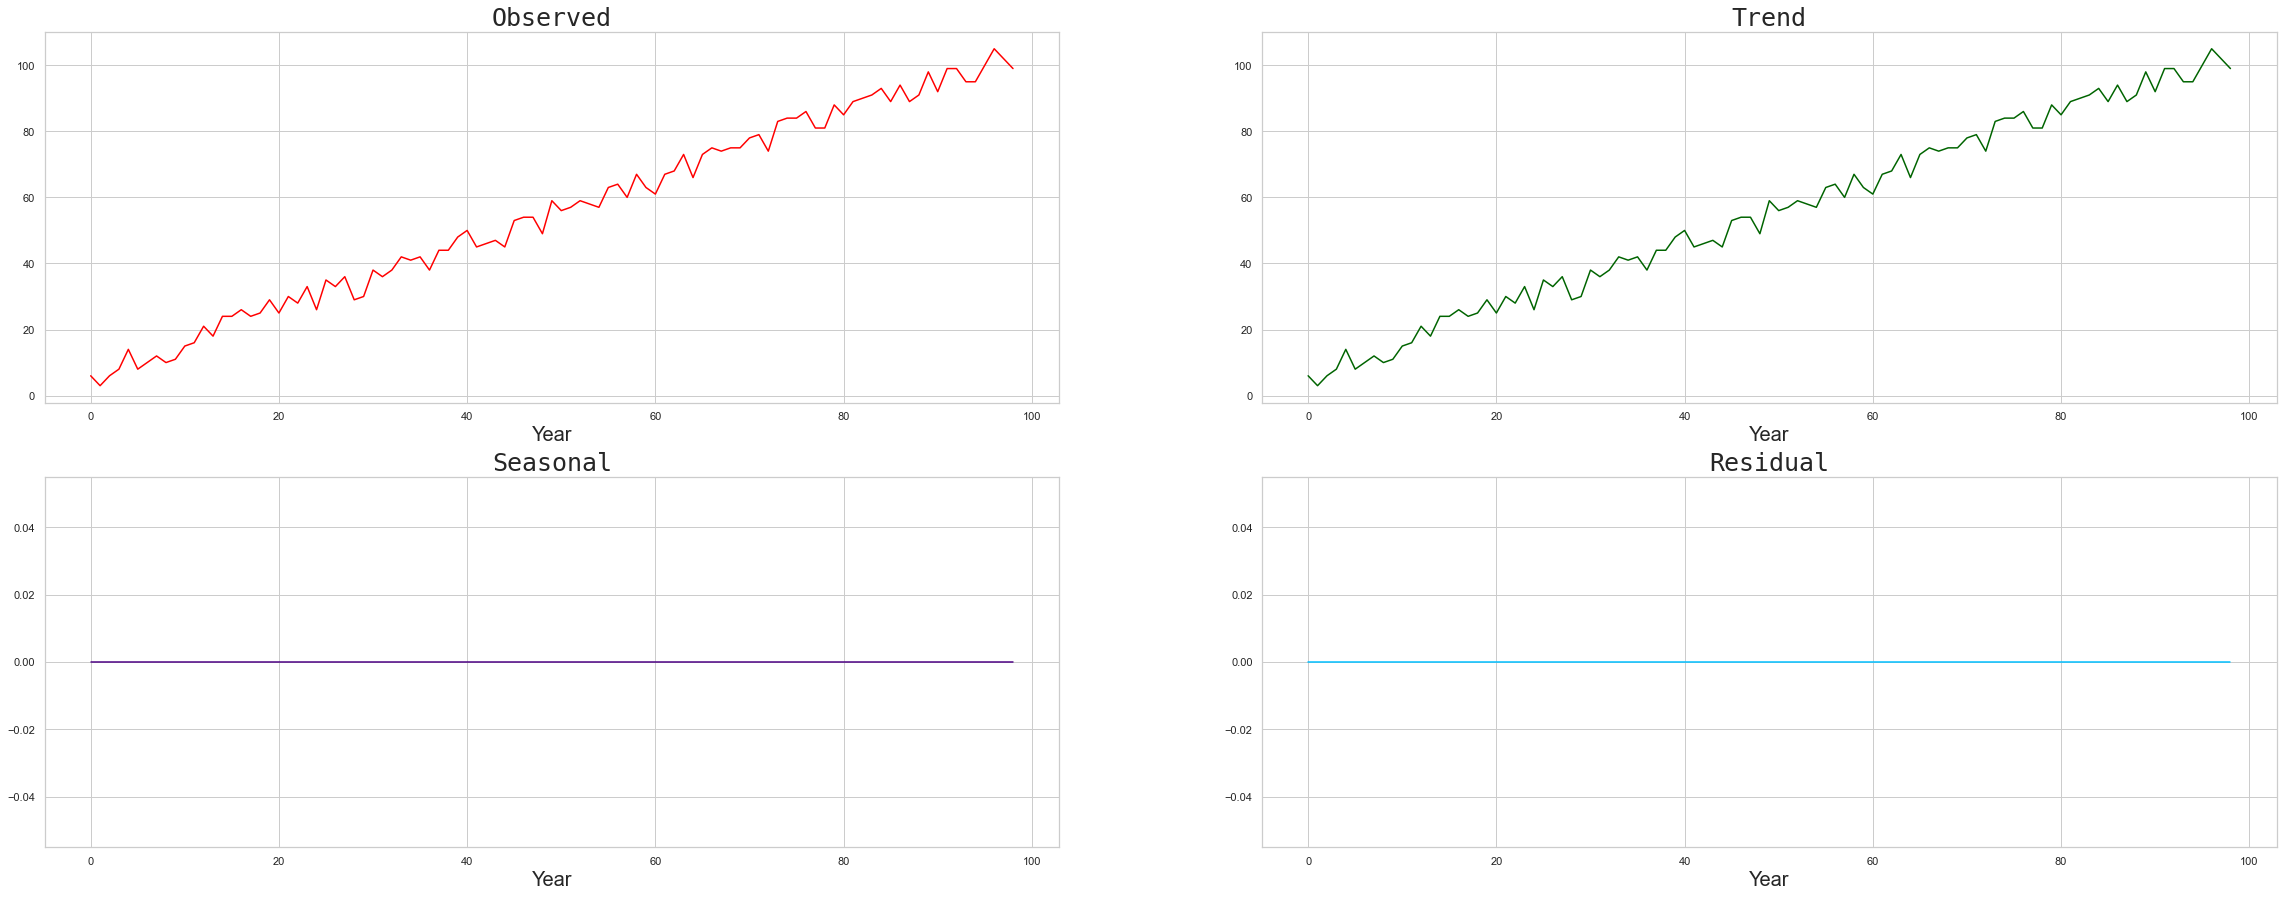

In [3]:
# Additive Decomposition Example

import random as rt
from statsmodels.tsa.seasonal import seasonal_decompose

series = [i+rt.randrange(10) for i in range(1,100)]

# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose

# period int, optional
# Period of the series. 
# Must be used if x is not a pandas object or if the index of x does not have a frequency. 
# Overrides default periodicity of x if x is a pandas object with a timeseries index.

result = seasonal_decompose(series, model='additive',period=1)

plotseaonal(result)

We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend. The naive decomposition method is a simple one, and there are more advanced decompositions available, like Seasonal and Trend decomposition using Loess or STL decomposition. Caution and healthy skepticism is needed when using automated decomposition methods.

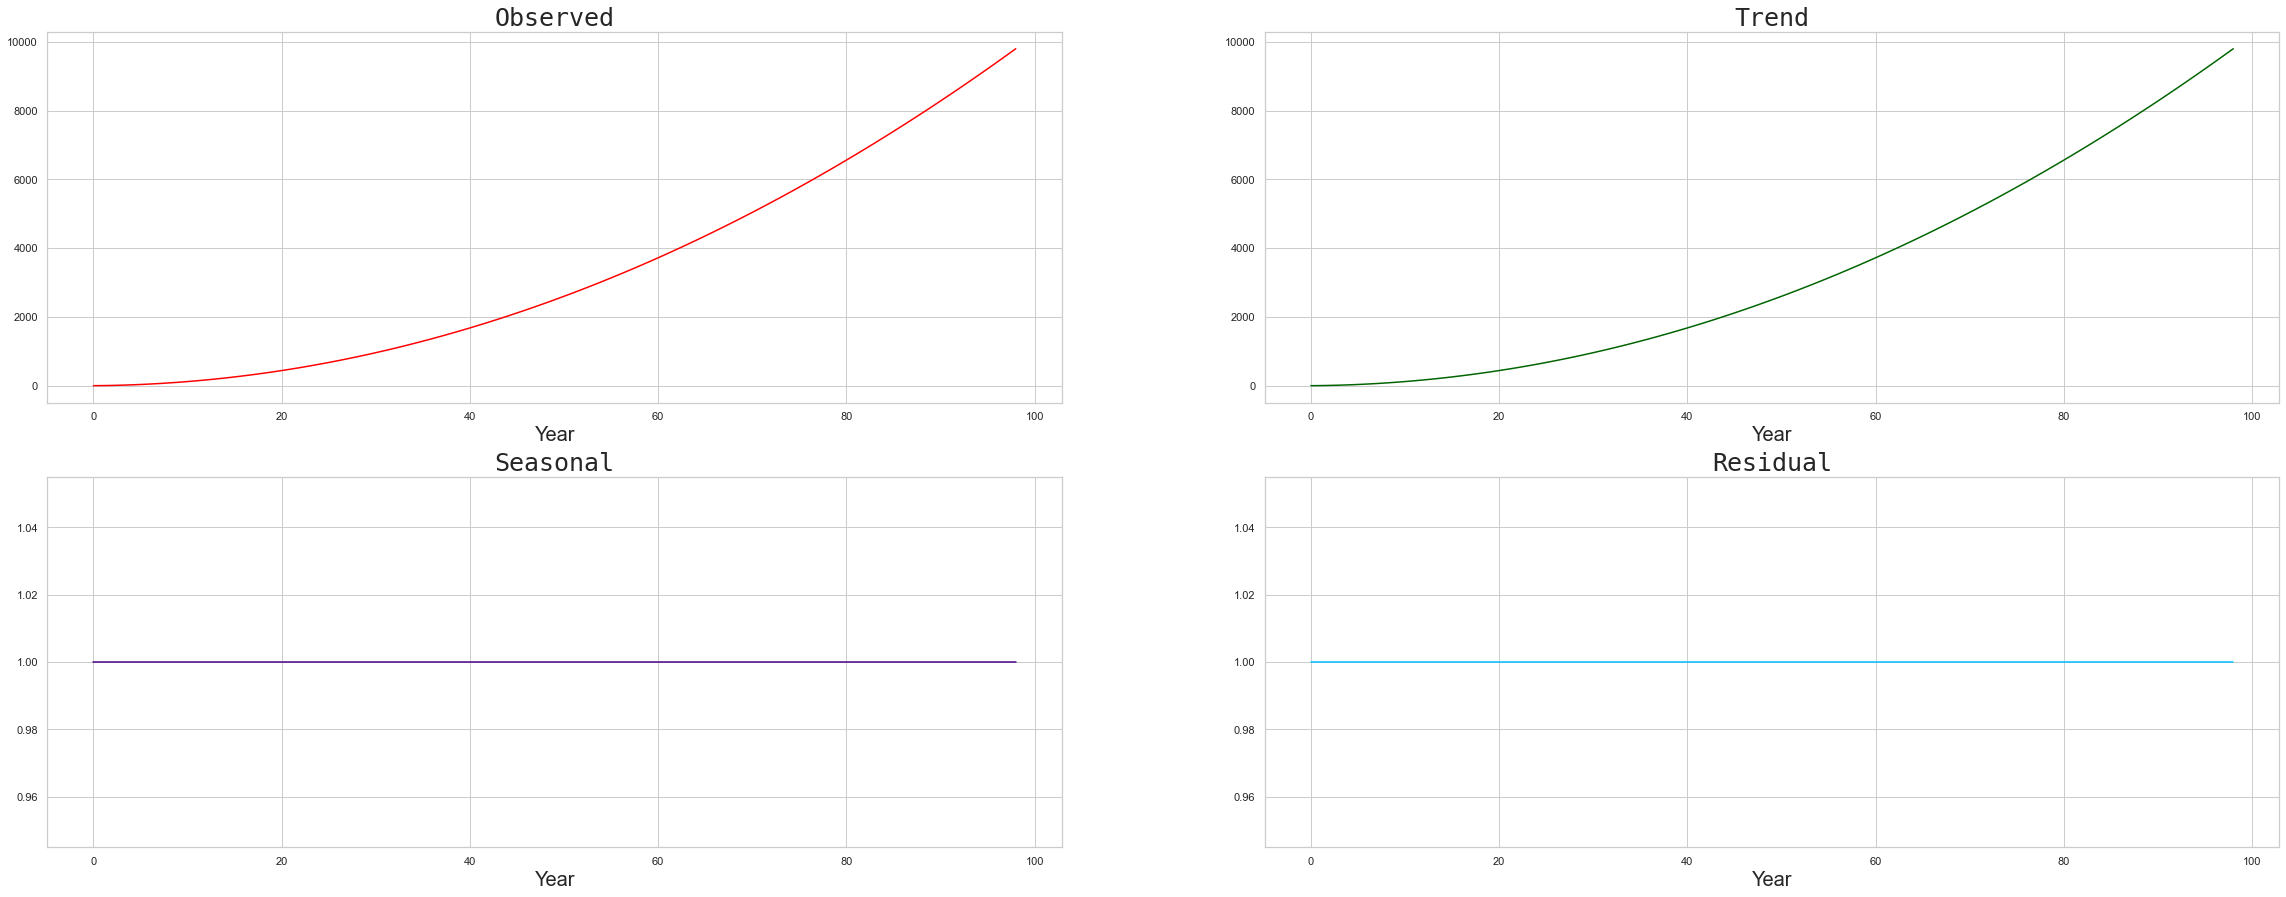

In [4]:
# Multiplicative Decomposition Example

from statsmodels.tsa.seasonal import seasonal_decompose

series = [i**2 for i in range(1,100)]

# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose

# period int, optional
# Period of the series. 
# Must be used if x is not a pandas object or if the index of x does not have a frequency. 
# Overrides default periodicity of x if x is a pandas object with a timeseries index.

result = seasonal_decompose(series, model='multiplicative',period=1)

plotseaonal(result)

Exponential changes can be made linear by data transforms. In this case, a quadratic trend can be made linear by taking the square root. An exponential growth in seasonality may be made linear by taking the natural logarithm.

Again, it is important to treat decomposition as a potentially useful analysis tool, but to consider exploring the many different ways it could be applied for your problem, such as on data after it has been transformed or on residual model errors.

In [5]:
# Using the Airline Passengers Dataset
series = pd.read_csv('airline-passengers.csv', header=0,index_col=0,squeeze=True, parse_dates=True)
series.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [6]:
result = seasonal_decompose(series,model='multiplicative')

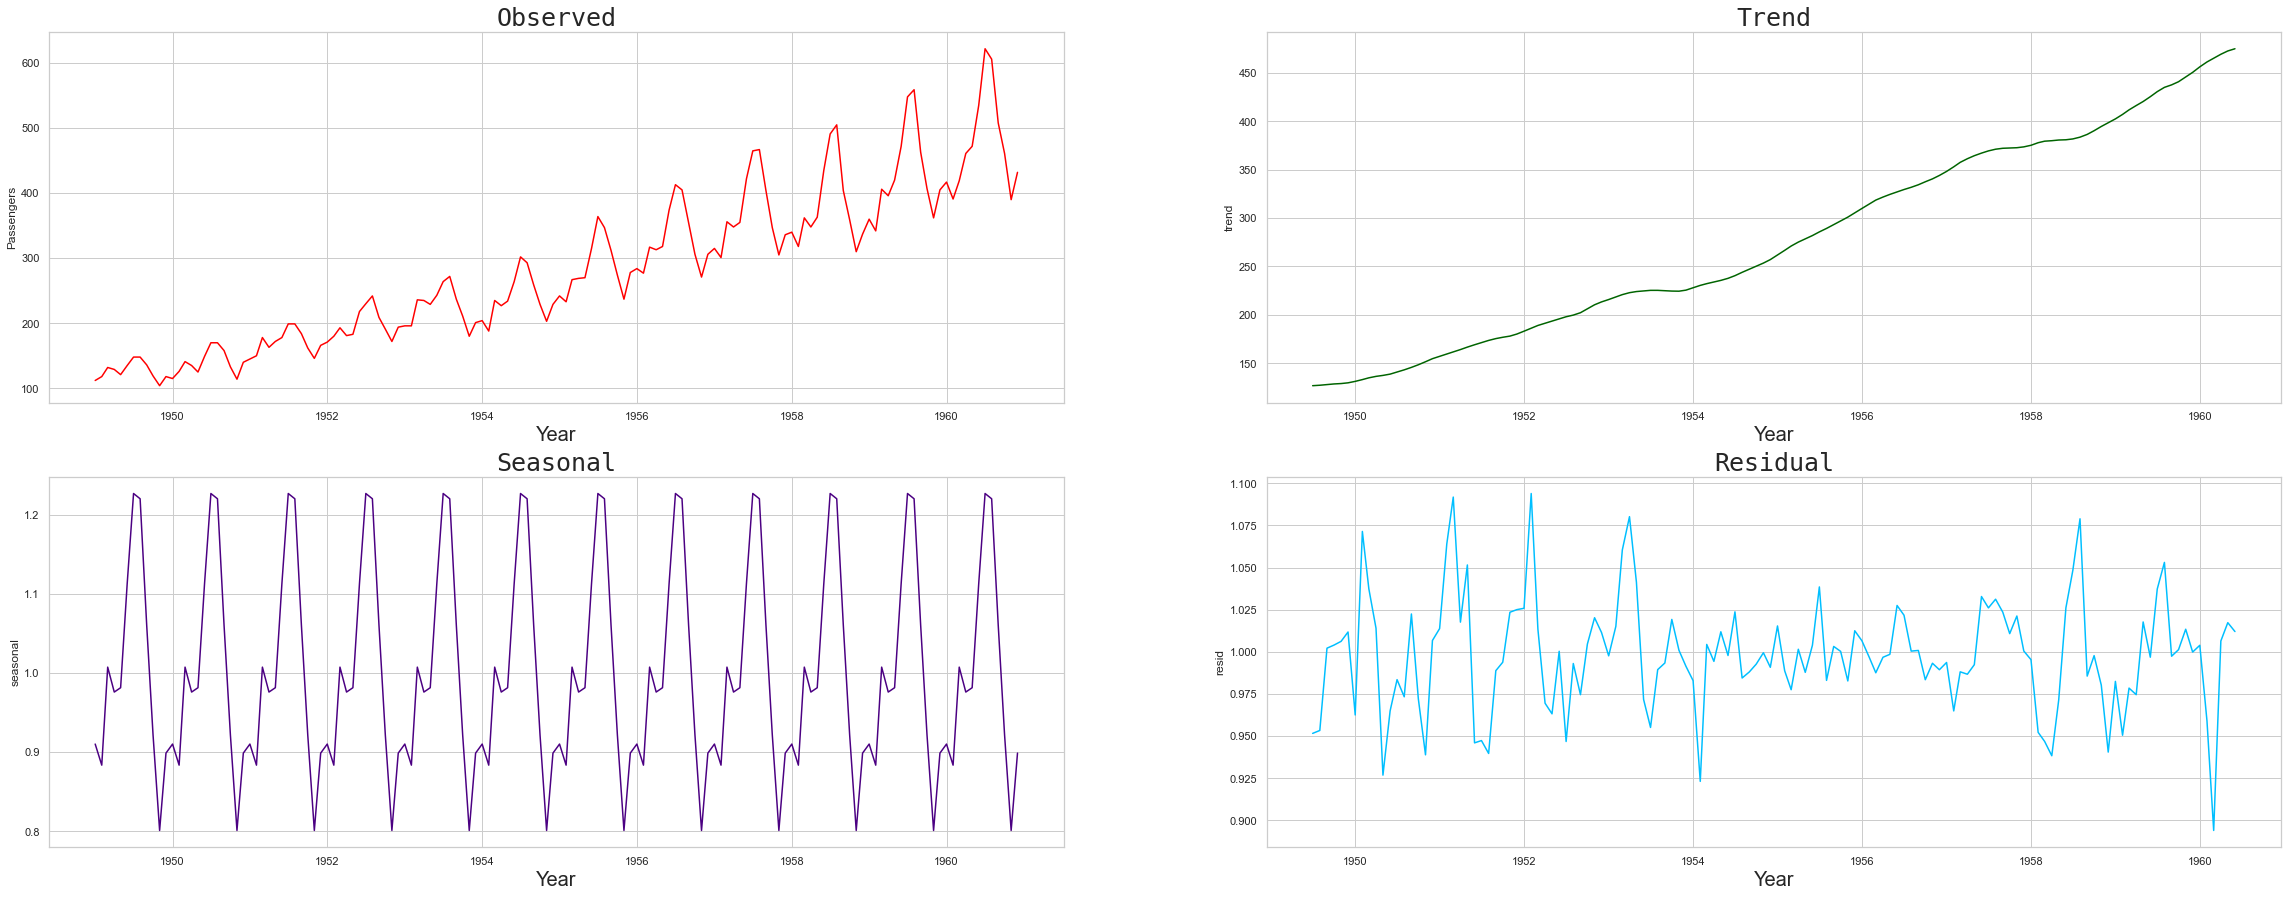

In [7]:
plotseaonal(result)

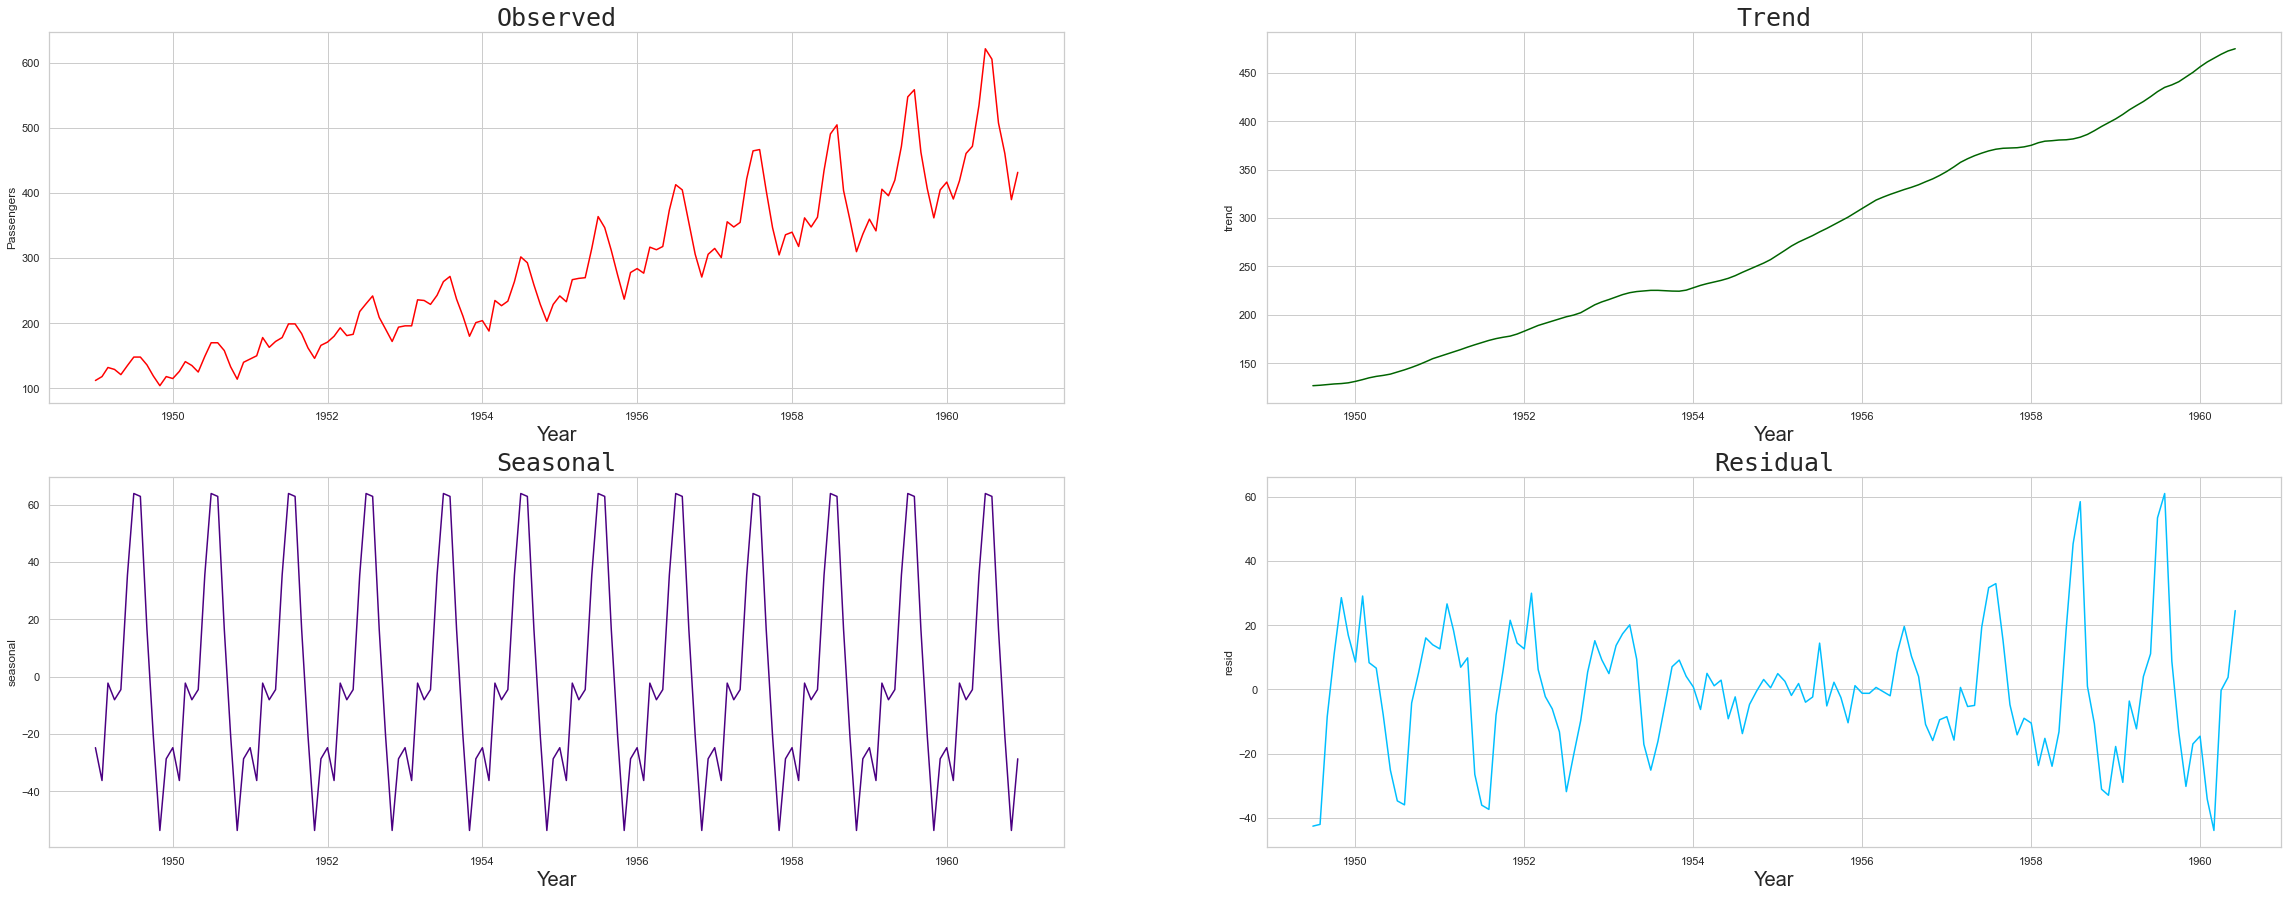

In [8]:
result = seasonal_decompose(series,model='additive')
plotseaonal(result)

**Summary**

You learned:
- The structure of decomposing time series into level, trend, seasonality, and noise.
- How to automatically decompose a time series dataset with Python.
- How to decompose an additive or multiplicative model and plot the results.

In [55]:
# The main function for decomposition plot
def plotseaonal2(result):
    palette= sns.color_palette("pastel")
    sns.set_theme(style='whitegrid', palette=palette)
    fig,ax = plt.subplots(4,1, figsize=(40,30))
   # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    fontdict={"fontsize":30,"fontfamily":'monospace'}

    colors_list = ['red',
                'darkgreen',
                'indigo','deepskyblue','darkmagenta',
                'midnightblue','crimson','chocolate']

    plot1 = sns.lineplot(data=result.observed,ax=ax[0],color=colors_list[0])
    plot2 = sns.lineplot(data=result.trend,ax=ax[1],color=colors_list[1])
    plot3 = sns.lineplot(data=result.seasonal,ax=ax[2],color=colors_list[2])
    plot4 = sns.lineplot(data=result.resid,ax=ax[3],color=colors_list[3])

    # Editing the fontsize and ticks of each label for x
    plot1.set_xlabel("Year",fontsize=30)
    
    
    # Ticks edits
    # xticks_observed = result.observed.index.year
    # plot1.set_xticklabels(labels=xticks_observed,fontsize=10)
    plot1.tick_params(axis='both', labelsize=30)

    plot2.set_xlabel("Year",fontsize=30)
    
    # Ticks edits
    # xticks_trend = result.trend.index.year
    # plot2.set_xticklabels(labels=xticks_trend,fontsize=10)
    plot2.tick_params(axis='both', labelsize=30)
    
    plot3.set_xlabel("Year",fontsize=30)
     
    # Ticks edits
    # xticks_seasonal = result.seasonal.index.year
    # plot3.set_xticklabels(labels=xticks_seasonal,fontsize=10)
    plot3.tick_params(axis='both', labelsize=30)
    
    plot4.set_xlabel("Year",fontsize=30)
    
    # Ticks edits
    # xticks_resid = result.resid.index.year 
    # plot4.set_xticklabels(labels=xticks_resid,fontsize=10)
    plot4.tick_params(axis='both', labelsize=30)
   

    # # # Editing the fontsize and ticks of each label for y
    # plot1.set_ylabel("Passengers",fontsize=20)

    # # Ticks edits
    # # yticks_observed = result.observed.values
    # # plot1.set_yticklabels(labels=yticks_observed,fontsize=20)

    # plot2.set_xlabel("Passengers",fontsize=20)

    # # Ticks edits
    # # yticks_trend = result.trend.values
    # # plot2.set_yticklabels(labels=yticks_trend,fontsize=20)
    
    # plot3.set_xlabel("Passengers",fontsize=20)

    # # Ticks edits
    # # yticks_seasonal = result.seasonal.values
    # # plot3.set_yticklabels(labels=yticks_seasonal,fontsize=20)
    
    # plot4.set_ylabel("Passengers",fontsize=20)

    # Ticks edits
    # yticks_resid = result.resid.values
    # plot4.set_yticklabels(labels=yticks_resid,fontsize=20)




    # Editing the title
    plot1.set_title("Observed",fontdict=fontdict)
    plot2.set_title("Trend",fontdict=fontdict)
    plot3.set_title("Seasonal",fontdict=fontdict)
    plot4.set_title("Residual",fontdict=fontdict)

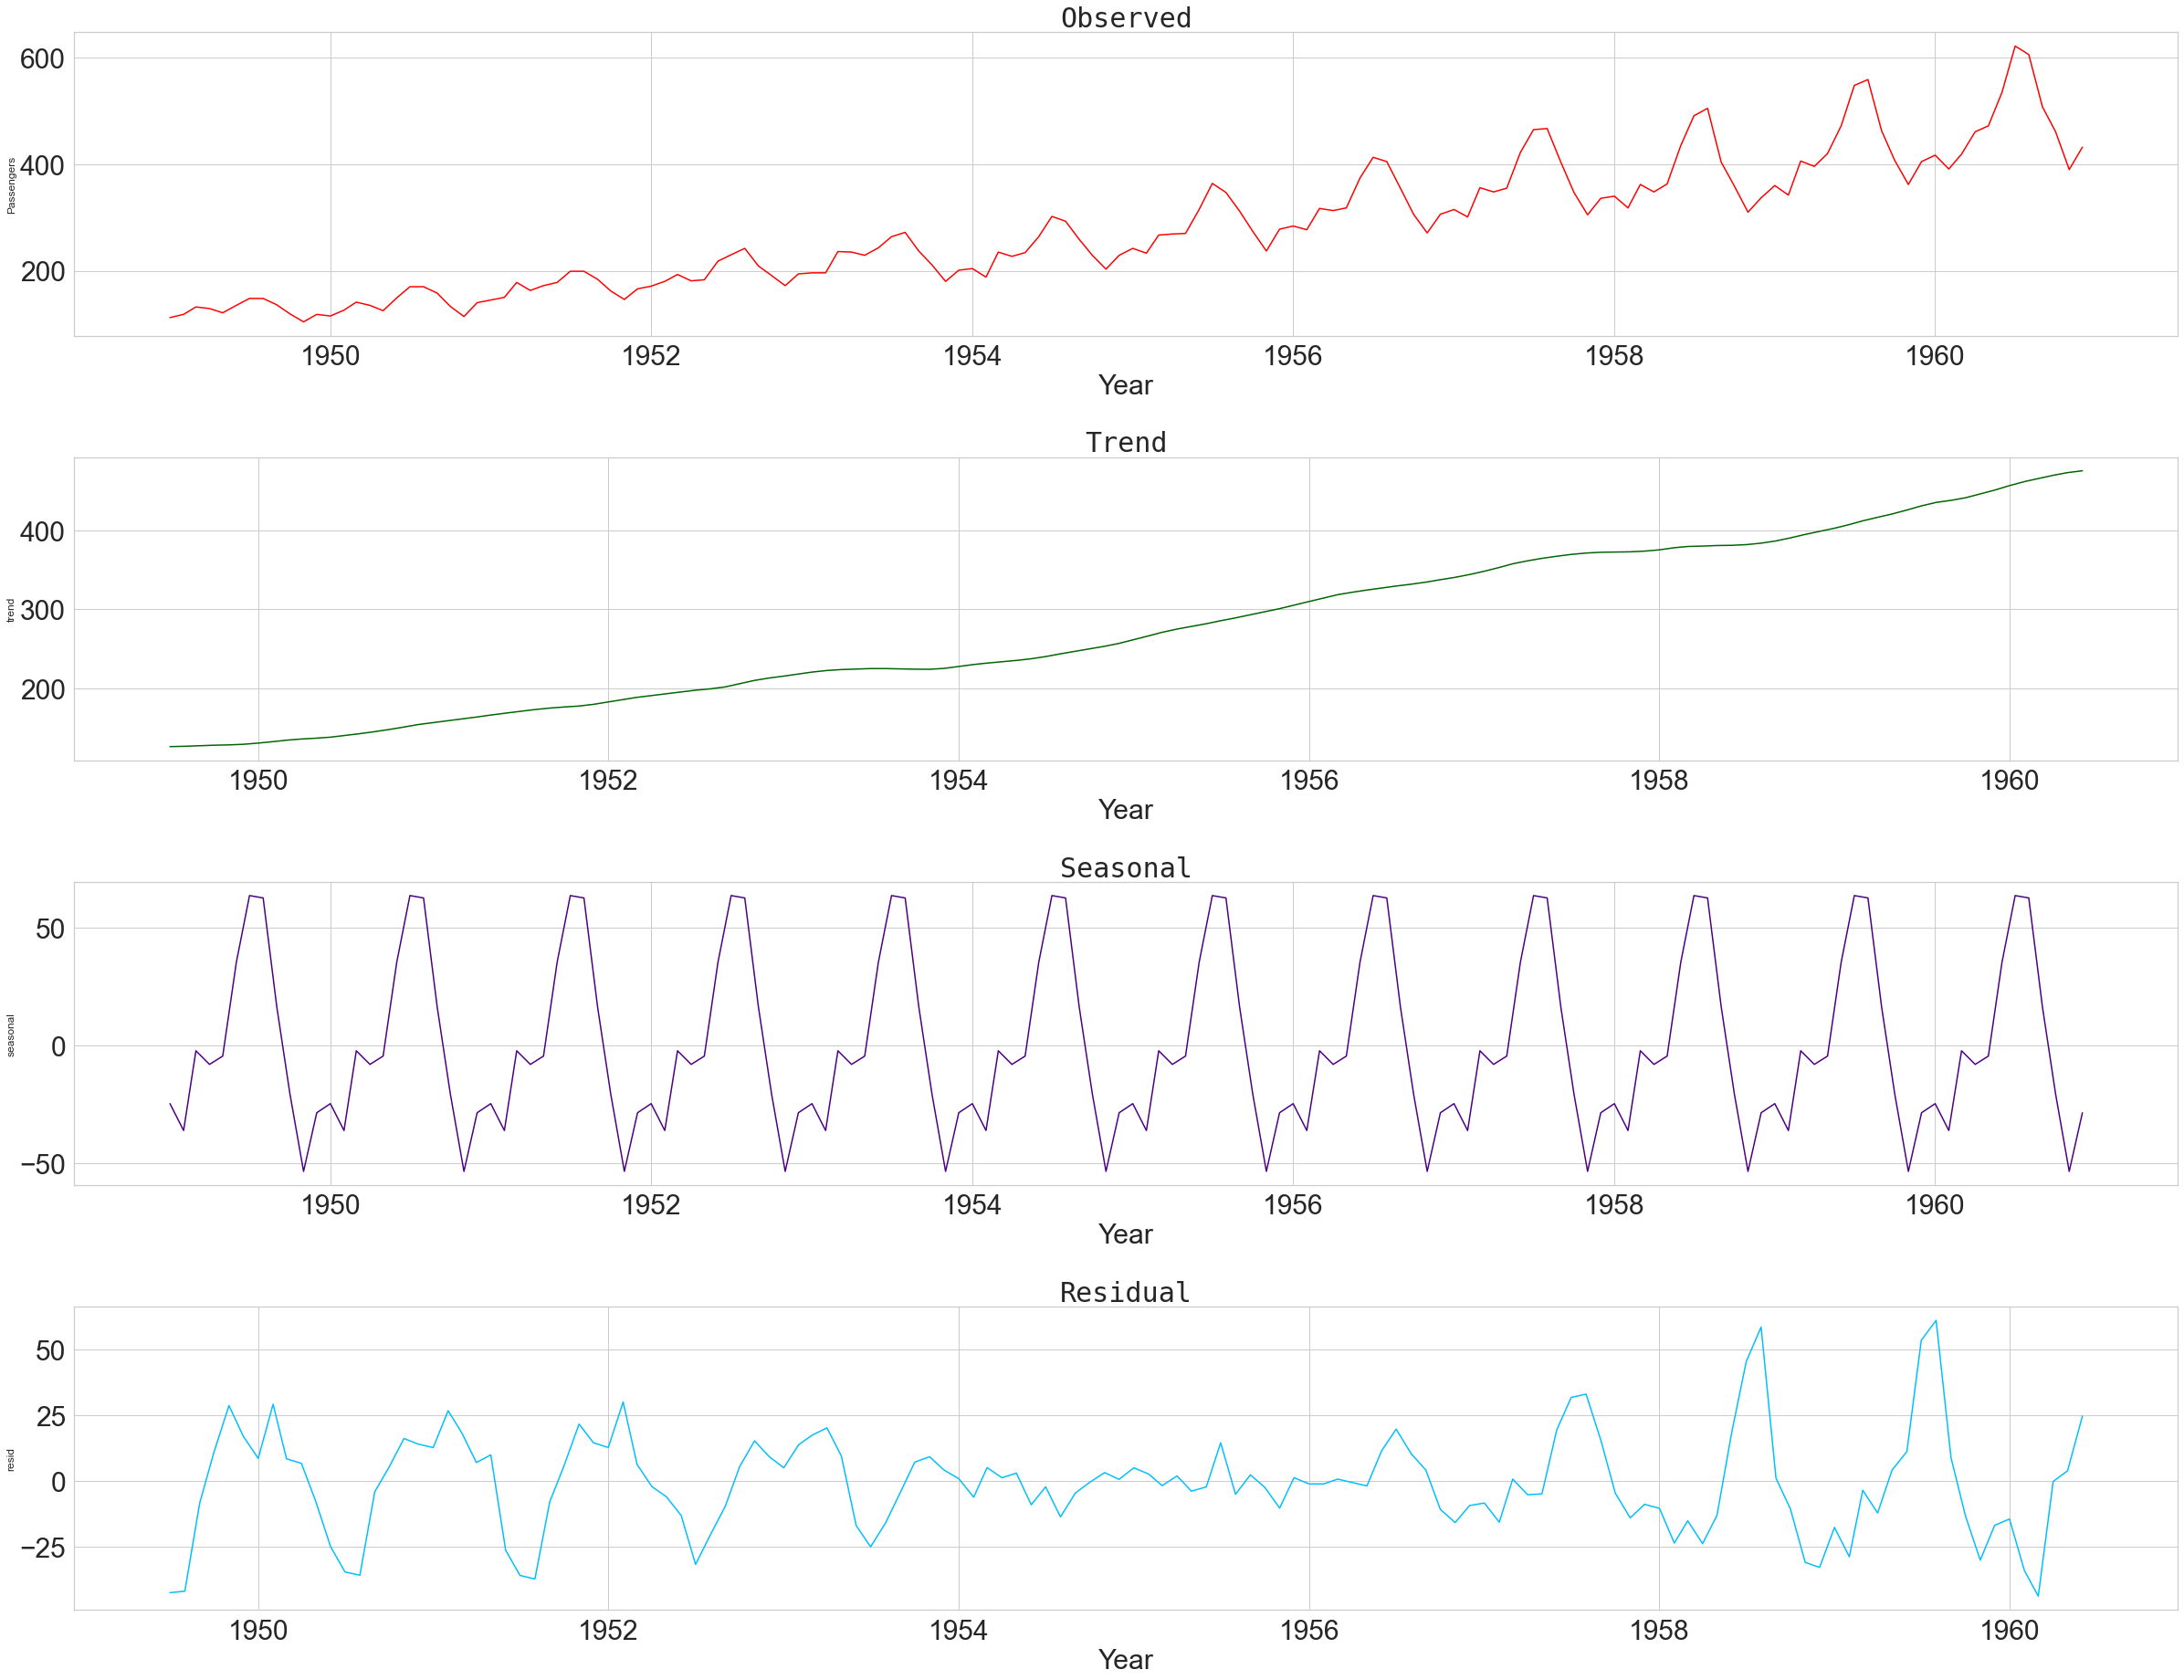

In [56]:
result = seasonal_decompose(series,model='additive')
plotseaonal2(result)